In [1]:
#importing required packages
import pandas as pd
import numpy as np
import torch as t
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split
np.random.seed(8)
from sklearn.preprocessing import LabelEncoder
import time
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
#Changing the default values of the below display settings to view the whole data clearly
pd.options.display.max_columns = 50
pd.options.display.max_rows = 5000
pd.options.display.float_format = '{:.2f}'.format

In [3]:
#Reading the csv
df = pd.read_csv('dataset.csv')

In [4]:
#This info function shows that the dataset have 4424 rows and 35 columns,where 34 are input feature 
# and 35th 'Target' is the categorical output. There are no missing values found.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [5]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00
mean,1.18,6.89,1.73,9.90,0.89,2.53,1.25,12.32,16.46,7.32,7.82,0.55,0.01,0.11,0.88,0.35,0.25,23.27,0.02,0.71,6.27,8.30,4.71,10.64,0.14,0.54,6.23,8.06,4.44,10.23,0.15,11.57,1.23,0.00
std,0.61,5.30,1.31,4.33,0.31,3.96,1.75,9.03,11.04,4.00,4.86,0.50,0.11,0.32,0.32,0.48,0.43,7.59,0.16,2.36,2.48,4.18,3.09,4.84,0.69,1.92,2.20,3.95,3.01,5.21,0.75,2.66,1.38,2.27
min,1.00,1.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.60,-0.80,-4.06
25%,1.00,1.00,1.00,6.00,1.00,1.00,1.00,2.00,3.00,5.00,5.00,0.00,0.00,0.00,1.00,0.00,0.00,19.00,0.00,0.00,5.00,6.00,3.00,11.00,0.00,0.00,5.00,6.00,2.00,10.75,0.00,9.40,0.30,-1.70
50%,1.00,8.00,1.00,10.00,1.00,1.00,1.00,13.00,14.00,6.00,8.00,1.00,0.00,0.00,1.00,0.00,0.00,20.00,0.00,0.00,6.00,8.00,5.00,12.29,0.00,0.00,6.00,8.00,5.00,12.20,0.00,11.10,1.40,0.32
75%,1.00,12.00,2.00,13.00,1.00,1.00,1.00,22.00,27.00,10.00,10.00,1.00,0.00,0.00,1.00,1.00,0.00,25.00,0.00,0.00,7.00,10.00,6.00,13.40,0.00,0.00,7.00,10.00,6.00,13.33,0.00,13.90,2.60,1.79
max,6.00,18.00,9.00,17.00,1.00,17.00,21.00,29.00,34.00,32.00,46.00,1.00,1.00,1.00,1.00,1.00,1.00,70.00,1.00,20.00,26.00,45.00,26.00,18.88,12.00,19.00,23.00,33.00,20.00,18.57,12.00,16.20,3.70,3.51


(array([1421.,    0.,    0.,    0.,    0., 2209.,    0.,    0.,    0.,
         794.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

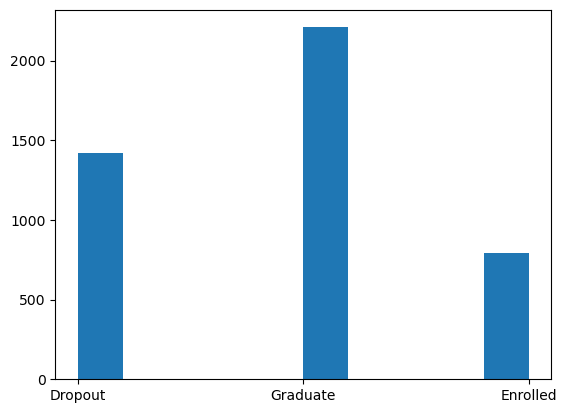

In [6]:
#distribution of the output classes
plt.hist(df['Target'])

In [7]:
#No duplicates found.
df[df.duplicated()].count()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

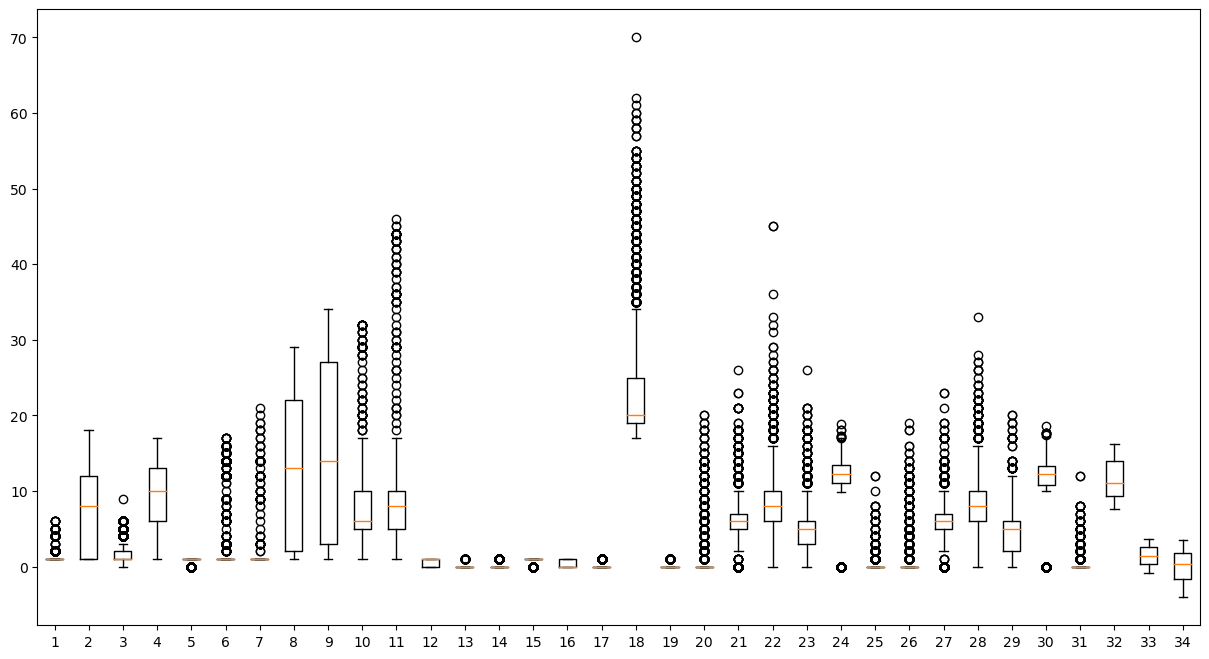

In [8]:
#This figure shows the range of all the input features.
fig = plt.figure(figsize =(15, 8))
plt.boxplot(df[df.columns[0:34]])
plt.show()

In [9]:
#A MinMaxScaler to normalize the data by scaling.
scaler = pp.MinMaxScaler()  
scaled_df = scaler.fit_transform(df[df.columns[0:34]]) 


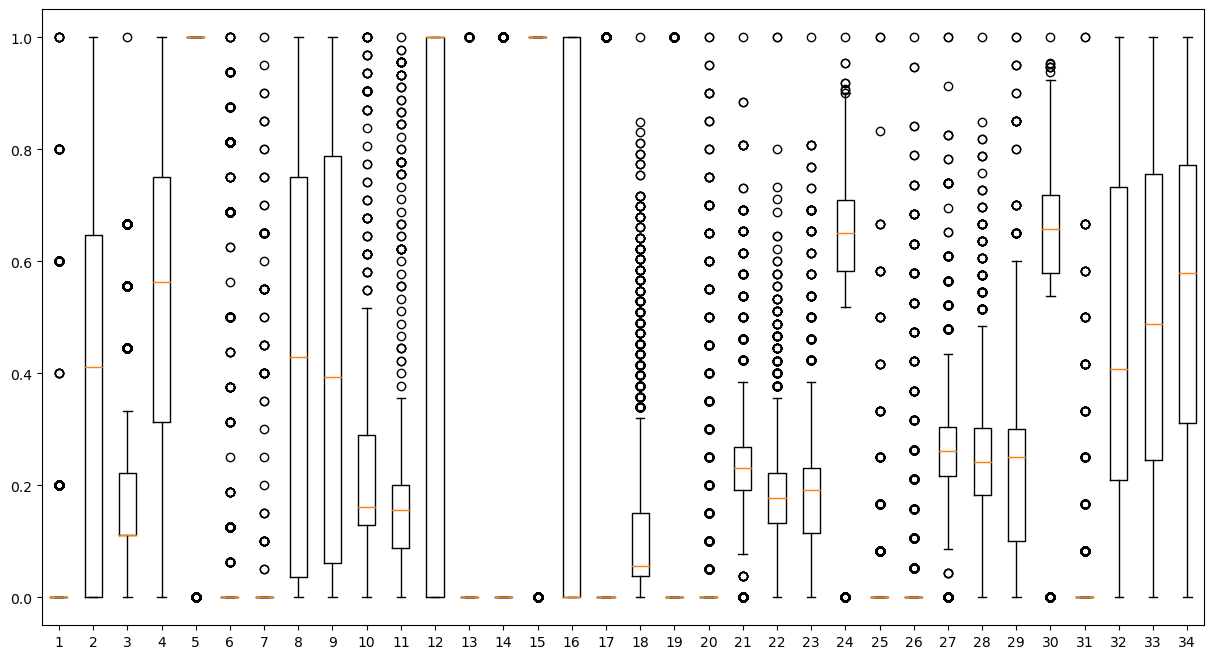

In [10]:
#Range of input features after scaling.
fig = plt.figure(figsize =(15, 8))
plt.boxplot(scaled_df)
plt.show()

In [11]:
## Matlab requires the 'Target' to be in one hot encoding format
#so we are changing this file and saving it in csv:'scaled_df.csv' , to use it in matlab,
'''
matlab_data = pd.DataFrame(scaled_df)
y_matlab = pd.get_dummies(df['Target'])
matlab_data['34'] = y_matlab['Dropout']
matlab_data['35'] = y_matlab['Enrolled']
matlab_data['36'] = y_matlab['Graduate']
matlab_data.to_csv('scaled_df.csv', index= False)
'''

"\nmatlab_data = pd.DataFrame(scaled_df)\ny_matlab = pd.get_dummies(df['Target'])\nmatlab_data['34'] = y_matlab['Dropout']\nmatlab_data['35'] = y_matlab['Enrolled']\nmatlab_data['36'] = y_matlab['Graduate']\nmatlab_data.to_csv('scaled_df.csv', index= False)\n"

In [12]:
#This object is used to encode the target variable into numeric labels
le = LabelEncoder() 
y = le.fit_transform(df['Target']) 

In [13]:
x = scaled_df

In [14]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

# Split training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=50)

In [15]:
#Input values are converted into Float Tensor
#Output values are converted into Long tensor
x_train = t.FloatTensor(x_train)
y_train = t.LongTensor(y_train)

x_test = t.FloatTensor(x_test)
y_test = t.LongTensor(y_test)

x_val = t.FloatTensor(x_val)
y_val = t.LongTensor(y_val)

In [16]:
#defining class defination of the perceptron
class SimpleNN(t.nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = t.nn.Linear(34,10)
        self.fc2 = t.nn.Linear(10,3)
        self.activation1 = t.nn.Sigmoid()
        #self.activation2 = t.nn.Softmax(dim=1), Since we have used CrossEntropyLoss function it 
        #by default applies Softmax function in the output layer
        
    def forward(self, x):
        hidden = self.fc1(x)
        hidden = self.activation1(hidden)
        
        output = self.fc2(hidden)
        return output

In [17]:
#Function for calculating the accuracy
def accuracy(pred_output, actual_output):
    out_compare = t.eq(t.argmax(pred_output, dim = 1), actual_output)

    acc = (t.count_nonzero(out_compare) / actual_output.shape[0]) * 100
   
    return float(acc)

In [18]:
model = SimpleNN()

In [19]:
model.eval()

SimpleNN(
  (fc1): Linear(in_features=34, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=3, bias=True)
  (activation1): Sigmoid()
)

In [20]:
#print(list(model.parameters()))

In [21]:
#Calculating test loss before training 
y_pred = model(x_test)
criterion2 = t.nn.CrossEntropyLoss()
before_train = criterion2(y_pred, y_test)
print('Test loss before training' , before_train.item())

Test loss before training 1.043428659439087


In [22]:
#Adam performed better than SGD for our dataset.
optimizer = t.optim.Adam(model.parameters(), lr = 0.01)

In [23]:
num_epochs = 500

In [24]:
ls_train_loss = []
ls_train_acc = []
ls_val_loss = []
ls_val_acc = []
ls_epoch = []
#calculating the start time of the training
start_time = time.time()


for epoch in range(num_epochs):
    ls_epoch.append(epoch)
    
    #training the model using train dataset
    output_train = model(x_train)
    loss = criterion2(output_train, y_train)
    ls_train_loss.append(loss.item())
    train_acc = accuracy(output_train, y_train)
    ls_train_acc.append(train_acc)
    
    #validating the model using the validation dataset
    output_val = model(x_val)
    val_loss = criterion2(output_val, y_val)
    val_acc = accuracy(output_val, y_val)
    ls_val_loss.append(val_loss.item())
    ls_val_acc.append(val_acc)
    

    
    print("Epoch ", epoch , ": train_loss:", loss.item(), "train_acc: ", train_acc, "val_loss: ", val_loss.item(), "val_acc: ", val_acc)
    #resetting the parameters after previous step
    optimizer.zero_grad() 
    #to calculate weights and bias through back propagation
    loss.backward()
    #to update the weights and bias
    optimizer.step()
    
end_time = time.time()
elapsed_time = end_time - start_time

Epoch  0 : train_loss: 1.0382275581359863 train_acc:  50.602867126464844 val_loss:  1.0409839153289795 val_acc:  49.71751403808594
Epoch  1 : train_loss: 1.025589108467102 train_acc:  50.602867126464844 val_loss:  1.0284533500671387 val_acc:  49.71751403808594
Epoch  2 : train_loss: 1.0179574489593506 train_acc:  50.602867126464844 val_loss:  1.0208531618118286 val_acc:  49.71751403808594
Epoch  3 : train_loss: 1.0145628452301025 train_acc:  50.602867126464844 val_loss:  1.0172837972640991 val_acc:  49.71751403808594
Epoch  4 : train_loss: 1.0136626958847046 train_acc:  50.602867126464844 val_loss:  1.0160415172576904 val_acc:  49.71751403808594
Epoch  5 : train_loss: 1.013174295425415 train_acc:  50.602867126464844 val_loss:  1.0150865316390991 val_acc:  49.71751403808594
Epoch  6 : train_loss: 1.0118348598480225 train_acc:  50.602867126464844 val_loss:  1.0132726430892944 val_acc:  49.71751403808594
Epoch  7 : train_loss: 1.0093694925308228 train_acc:  50.602867126464844 val_loss:  1

Epoch  77 : train_loss: 0.7044074535369873 train_acc:  70.94951629638672 val_loss:  0.678270697593689 val_acc:  72.99435424804688
Epoch  78 : train_loss: 0.7025500535964966 train_acc:  70.98719024658203 val_loss:  0.6763662695884705 val_acc:  73.2203369140625
Epoch  79 : train_loss: 0.7007365226745605 train_acc:  70.98719024658203 val_loss:  0.6745032072067261 val_acc:  72.99435424804688
Epoch  80 : train_loss: 0.6989642381668091 train_acc:  71.10022735595703 val_loss:  0.6726804375648499 val_acc:  72.88135528564453
Epoch  81 : train_loss: 0.6972304582595825 train_acc:  71.25093841552734 val_loss:  0.6708961129188538 val_acc:  72.88135528564453
Epoch  82 : train_loss: 0.6955331563949585 train_acc:  71.21326446533203 val_loss:  0.6691479086875916 val_acc:  72.99435424804688
Epoch  83 : train_loss: 0.6938704252243042 train_acc:  71.25093841552734 val_loss:  0.6674342751502991 val_acc:  73.10734558105469
Epoch  84 : train_loss: 0.6922407746315002 train_acc:  71.28861999511719 val_loss:  0

Epoch  176 : train_loss: 0.6061434745788574 train_acc:  75.01884460449219 val_loss:  0.5832659602165222 val_acc:  77.17514038085938
Epoch  177 : train_loss: 0.6055644750595093 train_acc:  75.0565185546875 val_loss:  0.582728922367096 val_acc:  77.28813171386719
Epoch  178 : train_loss: 0.6049903631210327 train_acc:  75.0565185546875 val_loss:  0.5821973085403442 val_acc:  77.40113067626953
Epoch  179 : train_loss: 0.6044212579727173 train_acc:  75.0565185546875 val_loss:  0.5816709995269775 val_acc:  77.40113067626953
Epoch  180 : train_loss: 0.6038569211959839 train_acc:  75.13187408447266 val_loss:  0.5811501145362854 val_acc:  77.40113067626953
Epoch  181 : train_loss: 0.6032974720001221 train_acc:  75.1695556640625 val_loss:  0.580634593963623 val_acc:  77.28813171386719
Epoch  182 : train_loss: 0.6027427315711975 train_acc:  75.1695556640625 val_loss:  0.5801246166229248 val_acc:  77.28813171386719
Epoch  183 : train_loss: 0.6021928787231445 train_acc:  75.32027435302734 val_loss:

Epoch  268 : train_loss: 0.5696250796318054 train_acc:  76.4129638671875 val_loss:  0.5527263879776001 val_acc:  78.0791015625
Epoch  269 : train_loss: 0.5693541169166565 train_acc:  76.48831939697266 val_loss:  0.552542507648468 val_acc:  78.19209289550781
Epoch  270 : train_loss: 0.5690844655036926 train_acc:  76.48831939697266 val_loss:  0.5523607730865479 val_acc:  78.19209289550781
Epoch  271 : train_loss: 0.5688161849975586 train_acc:  76.5260009765625 val_loss:  0.5521809458732605 val_acc:  78.19209289550781
Epoch  272 : train_loss: 0.5685490965843201 train_acc:  76.56368255615234 val_loss:  0.5520030856132507 val_acc:  78.19209289550781
Epoch  273 : train_loss: 0.5682833194732666 train_acc:  76.60135650634766 val_loss:  0.5518272519111633 val_acc:  78.19209289550781
Epoch  274 : train_loss: 0.5680187940597534 train_acc:  76.60135650634766 val_loss:  0.5516533851623535 val_acc:  78.19209289550781
Epoch  275 : train_loss: 0.5677553415298462 train_acc:  76.56368255615234 val_loss:

Epoch  359 : train_loss: 0.5473222732543945 train_acc:  77.39261627197266 val_loss:  0.5440284013748169 val_acc:  78.30508422851562
Epoch  360 : train_loss: 0.5470848083496094 train_acc:  77.46797180175781 val_loss:  0.5438219904899597 val_acc:  78.53107452392578
Epoch  361 : train_loss: 0.5468472838401794 train_acc:  77.4302978515625 val_loss:  0.5439155697822571 val_acc:  78.53107452392578
Epoch  362 : train_loss: 0.5466118454933167 train_acc:  77.4302978515625 val_loss:  0.5439915060997009 val_acc:  78.41808319091797
Epoch  363 : train_loss: 0.5463765263557434 train_acc:  77.46797180175781 val_loss:  0.5438262224197388 val_acc:  78.53107452392578
Epoch  364 : train_loss: 0.5461402535438538 train_acc:  77.50565338134766 val_loss:  0.5439796447753906 val_acc:  78.30508422851562
Epoch  365 : train_loss: 0.5459051728248596 train_acc:  77.50565338134766 val_loss:  0.5439642667770386 val_acc:  78.30508422851562
Epoch  366 : train_loss: 0.5456713438034058 train_acc:  77.54332733154297 val_

Epoch  440 : train_loss: 0.5299707055091858 train_acc:  78.40994262695312 val_loss:  0.5496436953544617 val_acc:  77.96610260009766
Epoch  441 : train_loss: 0.5297761559486389 train_acc:  78.40994262695312 val_loss:  0.5497651696205139 val_acc:  77.96610260009766
Epoch  442 : train_loss: 0.5295817852020264 train_acc:  78.4476318359375 val_loss:  0.5498800873756409 val_acc:  77.96610260009766
Epoch  443 : train_loss: 0.5293877720832825 train_acc:  78.4476318359375 val_loss:  0.5500015616416931 val_acc:  77.96610260009766
Epoch  444 : train_loss: 0.5291939973831177 train_acc:  78.40994262695312 val_loss:  0.5501202344894409 val_acc:  77.96610260009766
Epoch  445 : train_loss: 0.5290005803108215 train_acc:  78.40994262695312 val_loss:  0.550240159034729 val_acc:  77.96610260009766
Epoch  446 : train_loss: 0.5288074016571045 train_acc:  78.40994262695312 val_loss:  0.550362765789032 val_acc:  77.96610260009766
Epoch  447 : train_loss: 0.5286145806312561 train_acc:  78.40994262695312 val_lo

In [25]:
print(f"Total time taken to train the model: {elapsed_time} seconds")

Total time taken to train the model: 1.1483337879180908 seconds


In [26]:
#print(list(model.parameters()))

In [27]:
#calculating Test loss after training
y_pred = model(x_test)
after_train = criterion2(y_pred, y_test)
print('Test loss after training' , after_train.item())

Test loss after training 0.563145637512207


In [28]:
test_acc = accuracy(y_pred, y_test)
print("Testing accuracy: ", test_acc)

Testing accuracy:  75.81920623779297


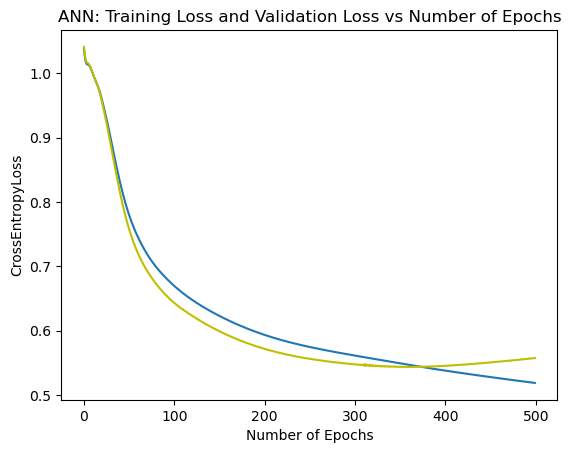

In [29]:
plt.plot(ls_epoch,ls_train_loss)
plt.plot(ls_epoch,ls_val_loss,'y')
plt.xlabel("Number of Epochs")
plt.ylabel("CrossEntropyLoss")
plt.title("ANN: Training Loss and Validation Loss vs Number of Epochs")
plt.show()

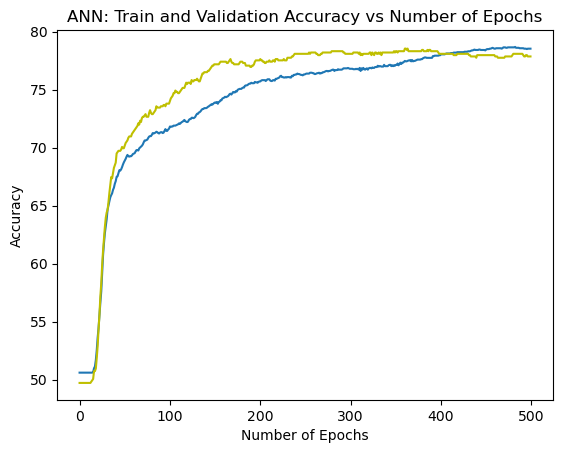

In [30]:
plt.plot(ls_epoch,ls_train_acc)
plt.plot(ls_epoch,ls_val_acc,'y')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("ANN: Train and Validation Accuracy vs Number of Epochs")
plt.show()

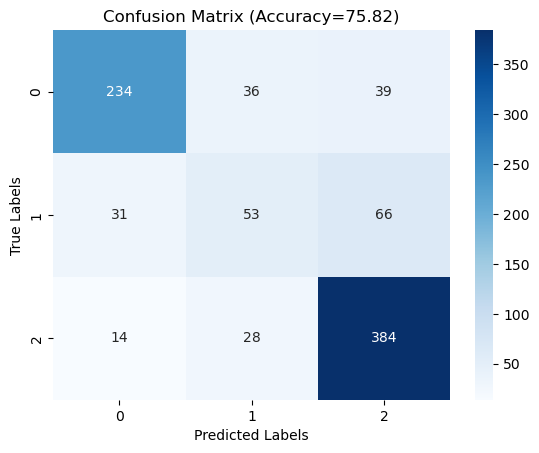

In [31]:
# Computing the confusion matrix and accuracy for the final epoch
y_pred = model(x_test)
y_pred_labels = np.argmax(y_pred.detach().numpy(), axis=1)
y_test_labels = y_test.detach().numpy()
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)

# Ploting the confusion matrix 
sns.heatmap(conf_matrix, annot = True, fmt='g', cmap='Blues')

# Adding labels and accuracy to the plot
plt.title('Confusion Matrix (Accuracy={:.2f})'.format(accuracy*100))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()